Load Dataset

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "AmesHousing.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "shashanknecrothapa/ames-housing-dataset",
  file_path,
)

print(df.head())

Using Colab cache for faster access to the 'ames-housing-dataset' dataset.
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   


See Dataset columns

In [ ]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
len(df)

2930

بررسی مقادیر خالی

In [ ]:
df.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


بررسی ستون های خالی با تعداد مقادیر خالی آن ها


In [ ]:
cols = df.isnull().sum()
print(cols[cols>0])

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


ستون هایی که در اکثر دیتاست خالی هستند را پاک میکنیم

In [ ]:
null_cols = df.columns[df.isnull().sum() > (1/10)*len(df)].tolist()
null_cols

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Fireplace Qu',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [ ]:
df = df.drop(null_cols, axis=1)

بررسی ستون های خالی با تعداد مقادیر خالی آن ها پس از پاکسازی اولیه

In [ ]:
cols = df.isnull().sum()
print(cols[cols>0])

Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64


بررسی سطر هایی که مقادیر خالی دارند

In [ ]:
low_null_cols = df.columns[df.isnull().sum() == 1].tolist()
rows_with_nulls = df[df[low_null_cols].isnull().any(axis=1)]
rows_index = rows_with_nulls.index
df = df.drop(rows_index, axis=0)
len(rows_index)


3

In [ ]:
cols = df.isnull().sum()
print(cols[cols>0])

Mas Vnr Area       23
Bsmt Qual          79
Bsmt Cond          79
Bsmt Exposure      82
BsmtFin Type 1     79
BsmtFin Type 2     80
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type       157
Garage Yr Blt     158
Garage Finish     158
Garage Qual       158
Garage Cond       158
dtype: int64


پر کردن موارد باقی مانده

In [ ]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


cols_to_none = [
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin Type 2',
    'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'
]

df[cols_to_none] = df[cols_to_none].fillna('None')

In [ ]:
cols = df.isnull().sum()
print(cols[cols>0])

Series([], dtype: int64)


تبدیل ستون های متنی به عددی

In [ ]:
df = pd.get_dummies(df, drop_first=True)

df = df.replace({True: 1, False: 0})

/tmp/ipython-input-232455615.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [ ]:
df.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0


نمایش توزیع داده ها

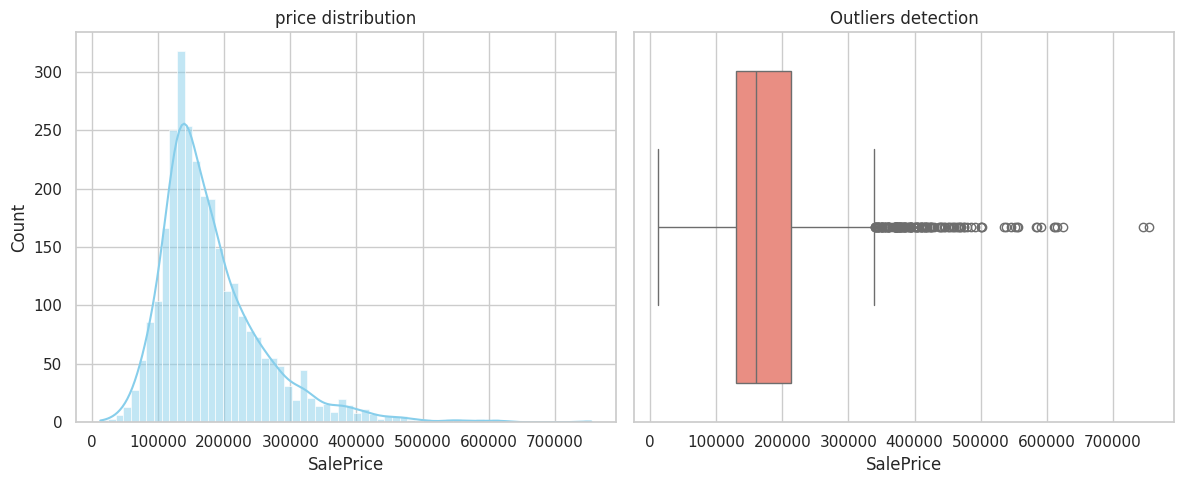

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['SalePrice'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('price distribution')

sns.boxplot(x=df['SalePrice'], ax=axes[1], color='salmon')
axes[1].set_title('Outliers detection')

plt.tight_layout()
plt.show()

از آنجایی که قیمت خانه ها دارای اندازه های پرت است و چولگی دارد: لگاریتم میگیریم

In [ ]:
import numpy as np

df['SalePrice'] = np.log1p(df['SalePrice'])


دوباره نمودار را میکشیم

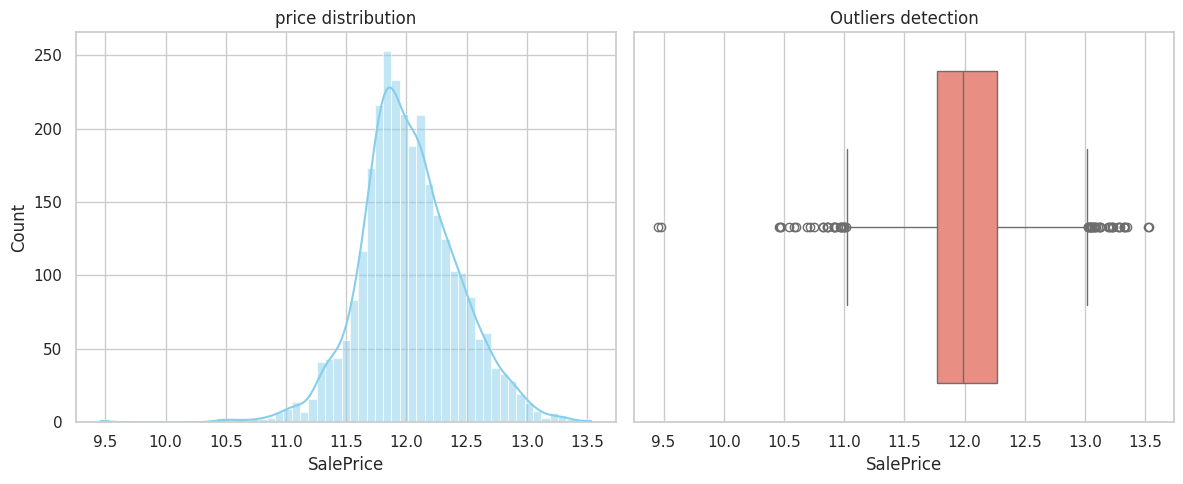

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['SalePrice'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('price distribution')

sns.boxplot(x=df['SalePrice'], ax=axes[1], color='salmon')
axes[1].set_title('Outliers detection')

plt.tight_layout()
plt.show()

چولگی و داده های پرت قیمت ها از بین رفت. حالا ویژگی هارا استاندارد سازی میکنیم.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target = df['SalePrice']
features = df.drop(columns=['SalePrice'])

features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

df_scaled = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)

In [ ]:
df_scaled.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice
0,-1.730523,-0.996140,-0.876743,2.742872,-0.068296,-0.506236,-0.376079,-1.163711,0.060445,0.430771,...,-0.298184,-0.048962,-0.018487,0.393816,-0.064161,-0.088995,-0.126359,0.462078,-0.302241,12.278398
1,-1.729342,-0.995881,-0.876743,0.186764,-0.777171,0.393432,-0.343002,-1.115754,-0.566422,0.055434,...,-0.298184,-0.048962,-0.018487,0.393816,-0.064161,-0.088995,-0.126359,0.462078,-0.302241,11.561725
2,-1.728160,-0.995876,-0.876743,0.522326,-0.068296,0.393432,-0.442234,-1.259626,0.038057,1.054137,...,-0.298184,-0.048962,-0.018487,0.393816,-0.064161,-0.088995,-0.126359,0.462078,-0.302241,12.055256
3,-1.726978,-0.995865,-0.876743,0.128151,0.640579,-0.506236,-0.111460,-0.780051,-0.566422,1.365820,...,-0.298184,-0.048962,-0.018487,0.393816,-0.064161,-0.088995,-0.126359,0.462078,-0.302241,12.404928
4,-1.725796,-0.991880,0.061248,0.466885,-0.777171,-0.506236,0.847786,0.658675,-0.566422,0.764403,...,-0.298184,-0.048962,-0.018487,0.393816,-0.064161,-0.088995,-0.126359,0.462078,-0.302241,12.154258


نمایش corrolation

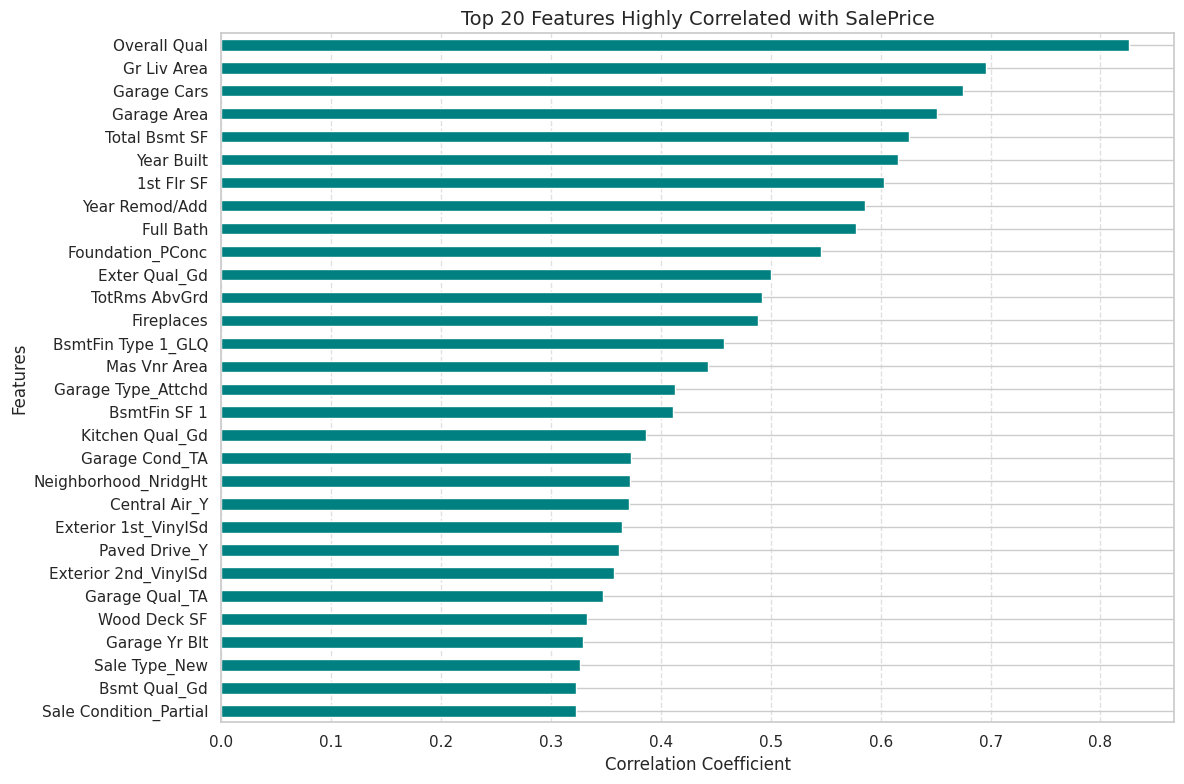

In [ ]:
import matplotlib.pyplot as plt
n = 30
top_corr = df_scaled.corr()['SalePrice'].sort_values(ascending=False).iloc[1:n+1]

plt.figure(figsize=(12, 8))
top_corr.sort_values().plot(kind='barh', color='teal')

plt.title('Top 20 Features Highly Correlated with SalePrice', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

تقسیم داده ها به اموزش و تست

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('SalePrice', axis=1)
y = df_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"تعداد داده‌های آموزش: {len(X_train)}")
print(f"تعداد داده‌های تست: {len(X_test)}")

تعداد داده‌های آموزش: 2341
تعداد داده‌های تست: 586


مدل رگرسیون خطی را اموزش میدهیم

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)


train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)

print(f"Linear Regression Train R2 Score: {train_score:.4f}")
print(f"Linear Regression Test R2 Score: {test_score:.4f}")

Linear Regression Train R2 Score: 0.9398
Linear Regression Test R2 Score: 0.8546


از رگرسیون غیر خطی استفاده میکنیم.
یه تابع برای توان دار کردن ویژگی ها استفاده میکنیم.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def get_polynomial_data(X_data, degree):
    """
    دریافت دیتاست و تبدیل آن به دیتاست جدید با توان مشخص شده
    """
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_data)

    # تبدیل به دیتافریم برای خوانایی بیشتر (اختیاری)
    poly_columns = poly.get_feature_names_out(X_data.columns)
    df_poly = pd.DataFrame(X_poly, columns=poly_columns)

    return df_poly

اموزش مدل غیر خطی

In [ ]:
my_degree = 2

X_poly_final = get_polynomial_data(X, my_degree)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly_final, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)

train_score = model_poly.score(X_train_p, y_train_p)
test_score = model_poly.score(X_test_p, y_test_p)

print(f"--- Results for Degree {my_degree} ---")
print(f"Train R2 Score: {train_score:.4f}")
print(f"Test R2 Score: {test_score:.4f}")
print(f"Number of Features: {X_poly_final.shape[1]}")

--- Results for Degree 2 ---
Train R2 Score: 1.0000
Test R2 Score: 0.6201
Number of Features: 32130


overfitting بسیار شدید رخ داد
از درجه دو استفاده میکنیم.
ولی این بار با feature selection

In [ ]:
from sklearn.linear_model import Ridge

my_degree = 2
alpha_value = 10

X_poly_final = get_polynomial_data(X, my_degree)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly_final, y, test_size=0.2, random_state=42)


model_poly = Ridge(alpha=alpha_value)
model_poly.fit(X_train_p, y_train_p)

train_score = model_poly.score(X_train_p, y_train_p)
test_score = model_poly.score(X_test_p, y_test_p)

print(f"--- Ridge Results for Degree {my_degree} (Alpha: {alpha_value}) ---")
print(f"Train R2 Score: {train_score:.4f}")
print(f"Test R2 Score: {test_score:.4f}")
print(f"Number of Features: {X_poly_final.shape[1]}")

--- Ridge Results for Degree 2 (Alpha: 10) ---
Train R2 Score: 0.9999
Test R2 Score: 0.7410
Number of Features: 32130


Feature Selection

In [ ]:
corr_matrix = df.corr()

top_30_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(31)
top_30_features = top_30_features.iloc[1:].index.tolist()

KeyError: 'SalePrice'

تقسیم دیتافریم جدید

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('SalePrice', axis=1)
X = X[top_30_features]
y = df_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"تعداد داده‌های آموزش: {len(X_train)}")
print(f"تعداد داده‌های تست: {len(X_test)}")

تعداد داده‌های آموزش: 2341
تعداد داده‌های تست: 586


In [ ]:
X.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', 'Year Built', '1st Flr SF', 'Exter Qual_TA',
       'Year Remod/Add', 'Full Bath', 'Foundation_PConc', 'Kitchen Qual_TA',
       'Exter Qual_Gd', 'TotRms AbvGrd', 'Fireplaces', 'Bsmt Qual_TA',
       'BsmtFin Type 1_GLQ', 'Mas Vnr Area', 'Garage Finish_Unf',
       'Garage Type_Attchd', 'BsmtFin SF 1', 'Garage Type_Detchd',
       'Kitchen Qual_Gd', 'Garage Cond_TA', 'Neighborhood_NridgHt',
       'Central Air_Y', 'Exterior 1st_VinylSd', 'Paved Drive_Y',
       'Heating QC_TA', 'Exterior 2nd_VinylSd'],
      dtype='object')

In [ ]:
my_degree = 2

X_poly_final = get_polynomial_data(X, my_degree)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly_final, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)

train_score = model_poly.score(X_train_p, y_train_p)
test_score = model_poly.score(X_test_p, y_test_p)

print(f"--- Results for Degree {my_degree} ---")
print(f"Train R2 Score: {train_score:.4f}")
print(f"Test R2 Score: {test_score:.4f}")
print(f"Number of Features: {X_poly_final.shape[1]}")

--- Results for Degree 2 ---
Train R2 Score: 0.9269
Test R2 Score: 0.4923
Number of Features: 495
